# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-29 06:00:22.336160


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/28/20


,10/28/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,8856413,227685,2.57
Brazil,5468270,158456,2.90
India,8040203,120527,1.50
Mexico,906863,90309,9.96
United Kingdom,945378,45765,4.84
Italy,589766,37905,6.43
France,1280215,35823,2.80


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/28/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
49172,US,8703811,2020-10-26,225706.0,477.0,66783.0,69967.142857
49171,US,8637028,2020-10-25,225229.0,340.0,60791.0,68768.000000
49170,US,8576237,2020-10-24,224889.0,914.0,83703.0,66969.857143
49169,US,8492534,2020-10-23,223975.0,943.0,83731.0,63229.142857
49168,US,8408803,2020-10-22,223032.0,856.0,71675.0,61146.714286
49167,US,8337128,2020-10-21,222176.0,1124.0,62748.0,59997.000000
49166,US,8274380,2020-10-20,221052.0,933.0,60339.0,59535.857143


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/28/20


,10/28/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,500677,33435.0,6.68
Texas,911835,18162.0,1.99
California,919276,17529.0,1.91
Florida,790426,16571.0,2.10
New Jersey,232997,16324.0,7.01
Massachusetts,154218,9924.0,6.44
Illinois,393797,9889.0,2.51


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/28/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1683,California,910438,2020-10-26,17386.0,28.0,3842.0,4399.000000
1682,California,906596,2020-10-25,17358.0,15.0,2912.0,4414.857143
1681,California,903684,2020-10-24,17343.0,38.0,4885.0,4295.714286
1680,California,898799,2020-10-23,17305.0,49.0,5435.0,3935.142857
1679,California,893364,2020-10-22,17256.0,89.0,6425.0,3602.285714
1678,California,886939,2020-10-21,17167.0,112.0,3193.0,3105.000000
1677,California,883746,2020-10-20,17055.0,73.0,4101.0,3205.142857


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/28/20


,10/28/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,303369,7040.0,2.32
Orange,59213,1467.0,2.48
Riverside,67299,1305.0,1.94
San Bernardino,63850,1073.0,1.68
San Diego,55540,881.0,1.59
Sacramento,25750,496.0,1.93
San Joaquin,21906,490.0,2.24


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/28/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5336,Los Angeles,300614,2020-10-26,7000.0,7.0,854.0,1606.857143
5335,Los Angeles,299760,2020-10-25,6993.0,4.0,823.0,1615.571429
5334,Los Angeles,298937,2020-10-24,6989.0,15.0,2116.0,1543.000000
5333,Los Angeles,296821,2020-10-23,6974.0,18.0,2756.0,1371.285714
5332,Los Angeles,294065,2020-10-22,6956.0,12.0,3579.0,1126.000000
5331,Los Angeles,290486,2020-10-21,6944.0,32.0,477.0,781.428571
5330,Los Angeles,290009,2020-10-20,6912.0,35.0,643.0,894.142857
5329,Los Angeles,289366,2020-10-19,6877.0,1.0,915.0,912.000000
5328,Los Angeles,288451,2020-10-18,6876.0,13.0,315.0,902.285714
5327,Los Angeles,288136,2020-10-17,6863.0,8.0,914.0,995.857143



7 day new US cases as of 10/28/20


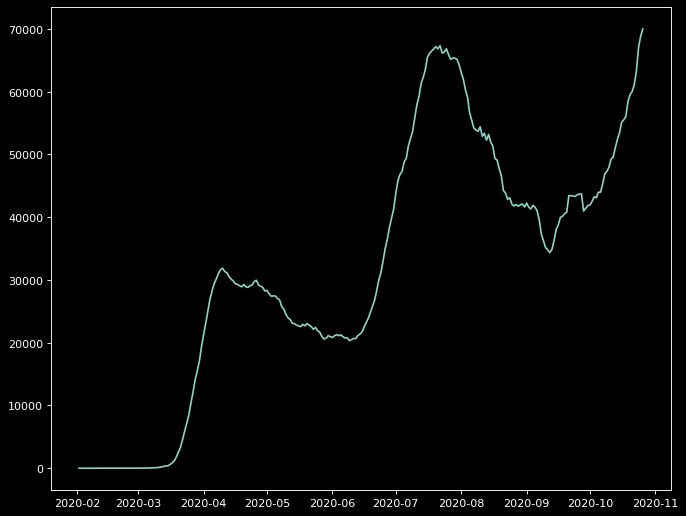

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/28/20


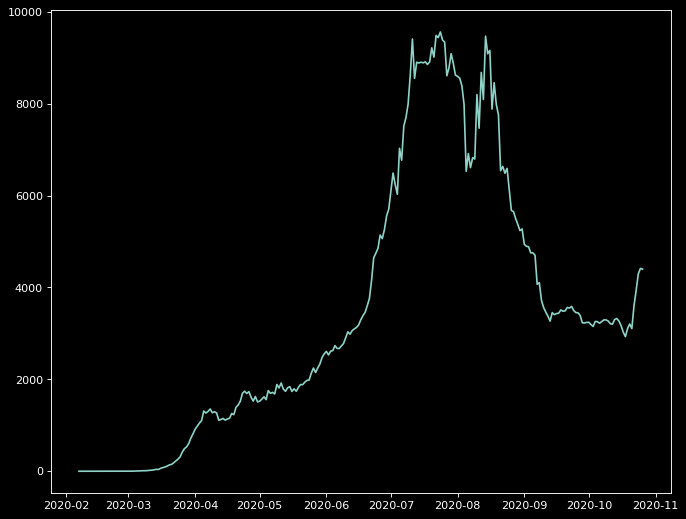

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/28/20


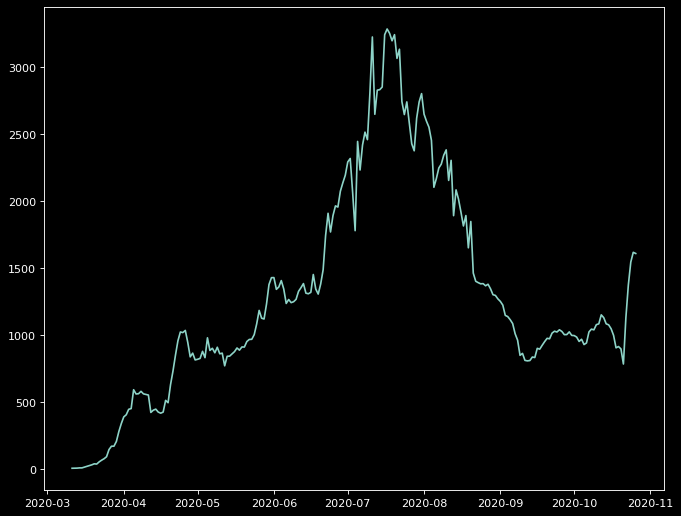

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()